# AD, QLattice, Ubuntu, 25-11-21

In [1]:
from platform import python_version
print(python_version())

3.8.10


In [2]:
import numpy as np
import pandas as pd
import feyn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
feyn._qlattice._USE_V2_API=True

In [3]:
feyn.__version__

'2.1.2'

In [4]:
# Load the data
data = pd.read_csv("../datasets/ad_omics.csv")

In [5]:
# Define the semantic types
stypes = {}
for f in data.columns:
    if data[f].dtype =='object':
        stypes[f] = 'c'
        
# Set random seed for reproducibility
random_seed = 42

In [6]:
target = "_clinical AD diagnosis"

# <font color = "Green"> In depth modelling </font>

In [9]:
def modsum(models, train, test):
     model_list=[]
     auc_list_train=[]
     auc_list_test=[]
     bic_list=[]
     feat_list=[]
     loss_list=[]
     i=0
     for x in models:
         model_list.append(str(i))
         auc_list_train.append(str(x.roc_auc_score(train).round(2)))
         auc_list_test.append(str(x.roc_auc_score(test).round(2)))
         bic_list.append(str(x.bic.round(2)))
         feat_list.append(len(x.features))
         loss_list.append(x.loss_value)
         i+=1
     df = pd.DataFrame(list(zip(model_list, auc_list_train, auc_list_test, bic_list, feat_list, loss_list)),
                   columns =['Model', 'AUC Train', 'AUC Test','BIC','NumFeatures','Loss'])
     return(df)    

In [10]:
projectname = 'ad_ms_proteomics_'
pathname = '../figures/in_depth/'

### Get the test data

In [7]:
random_seed = 2
train_val, test = train_test_split(data, test_size=0.2, stratify=data[target], random_state=random_seed)

In [8]:
epochs = 50
criterion = 'bic'
max_complexity = 5
random_seed = 42
sw = np.where(train_val[target] == 1, np.sum(train_val[target] == 0)/sum(train_val[target]), 1)

In [13]:
ql = feyn.connect_qlattice(server="https://qlattice.stage.abzu.ai") # Connecting
ql.reset(random_seed) # Resetting
models_single = ql.auto_run(data = train_val,
                         output_name = target,
                         kind = "classification",
                         stypes = stypes,
                         n_epochs = epochs,
                         criterion=criterion,
                         max_complexity = max_complexity,
                         sample_weights=sw)

# Model summary

In [14]:
modsum(models_single, train_val, test)

,Model,AUC Train,AUC Test,BIC,NumFeatures,Loss
0,0,0.97,0.94,54.49,2,0.206917
1,1,0.97,0.94,54.81,2,0.208383
2,2,0.97,0.92,55.33,3,0.189237
3,3,0.97,0.79,56.59,2,0.216540
4,4,0.96,0.96,59.91,2,0.231778
5,5,0.96,0.91,61.58,2,0.239441
6,6,0.96,0.97,61.73,2,0.240120
7,7,0.96,0.92,61.78,2,0.240353
8,8,0.96,0.97,63.14,2,0.246588
9,9,0.96,0.98,63.67,2,0.249014


# Best model from autorun

<?xml version="1.0" encoding="utf-8" ?>
<svg baseProfile="full" height="216.0" preserveAspectRatio="none" version="1.1" viewBox="0 0 741 216.0" width="741" xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><svg class="graph" height="155.0" width="471" x="0" y="0"><defs /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="361" y="50.0"><title>_clinical AD diagnosis
logistic:
w=-2.2546
bias=4.0716</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="406.0" y="71.5">_clinica..</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="449" y="59.0">0</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="363" y="59.0">out</text><line stroke="#1E1E1E" x1="331" x2="361" y1="67.5" y2="67.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="241" y="50.0"><title>squared</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="286.0" y="71.5">squared</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="329" y="59.0">1</text><line stroke="#1E1E1E" x1="211" x2="241" y1="67.5" y2="67.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="121" y="50.0"><title>add</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="166.0" y="71.5">add</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="209" y="59.0">2</text><line stroke="#1E1E1E" x1="91" x2="121" y1="37.5" y2="58.5" /><line stroke="#1E1E1E" x1="91" x2="121" y1="97.5" y2="76.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="20.0"><title>MAPT
linear:
scale=0.000026
scale offset=25639.645439
w=2.086603
bias=0.2003</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="46.0" y="41.5">MAPT</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="89" y="29.0">3</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="3" y="29.0">num</text><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="80.0"><title>NID2
linear:
scale=0.000013
scale offset=143013.326190
w=-0.673072
bias=-1.5869</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="46.0" y="101.5">NID2</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="89" y="89.0">4</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="3" y="89.0">num</text></svg><svg class="summary" height="79" width="180" x="471" y="0"><defs /><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="0" y="14">Training Metrics</text><line stroke="#1E1E1E" x1="0" x2="160" y1="19" y2="19" /><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="5" y="34">Accuracy</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="155" y="34">0.899</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="5" y="49">AUC</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="155" y="49">0.973</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="5" y="64">Precision</text>
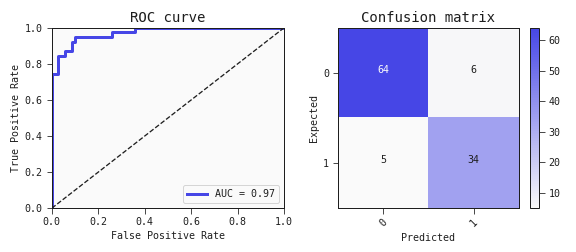
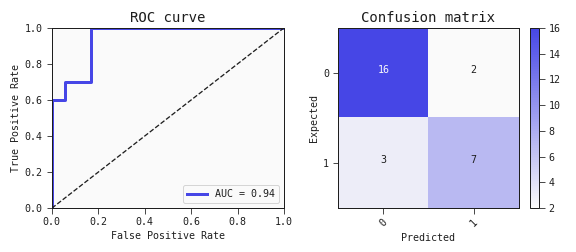

In [15]:
models_single[0].plot(train_val,test)

# Plot feature conservation across models with dirac

In [16]:
from dirac.compare import *
model_features_chart(test, models_single, metric="roc_auc_score")

,agreement,roc_auc_score,MAPT,NID2,GOLIM4,CDH22,PLOD3,hCG_2039566,CDH11,H6PD,YWHAG
Model#,,,,,,,,,,,
9,1.000000,0.977778,True,False,False,False,False,False,True,False,False
6,0.964286,0.972222,True,False,False,False,False,True,False,False,False
8,0.964286,0.966667,True,False,False,True,False,False,False,False,False
4,0.821429,0.955556,True,False,False,False,False,False,False,True,False
0,0.892857,0.944444,True,True,False,False,False,False,False,False,False
1,0.857143,0.944444,True,True,False,False,False,False,False,False,False
7,0.857143,0.922222,True,False,True,False,False,False,False,False,False
2,0.857143,0.916667,True,True,False,False,False,False,False,False,True
5,0.857143,0.905556,True,False,True,False,False,False,False,False,False


In [17]:
excello = model_features_chart(test, models_single, metric="roc_auc_score")

In [18]:
excello.to_excel('AD_QLAttice_Ubuntu_features_chart_autorun_best_251121.xlsx')

ModuleNotFoundError: No module named 'openpyxl'

# Exploring model 0 further

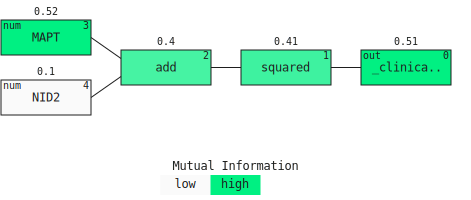

In [19]:
models_single[0].plot_signal(test,corr_func='mutual_information',filename=pathname+projectname+'bestmodel_signal_MI'+'.svg')

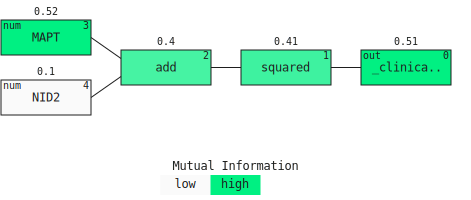

In [20]:
models_single[0].plot_signal(test,corr_func='mutual_information')

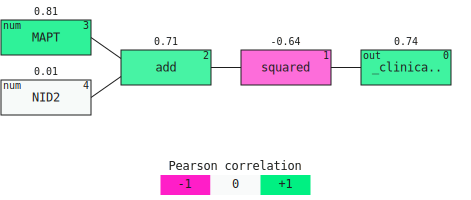

In [21]:
models_single[0].plot_signal(test,corr_func='pearson',filename=pathname+projectname+'bestmodel_signal_PEARSON'+'.svg')

In [22]:
sympy_model = models_single[0].sympify(symbolic_lr = True, signif=3)
sympy_model.as_expr()

1/(0.0171*exp(4.86*(3.66e-5*MAPT - 6.18e-6*NID2 - 1)**2) + 1)

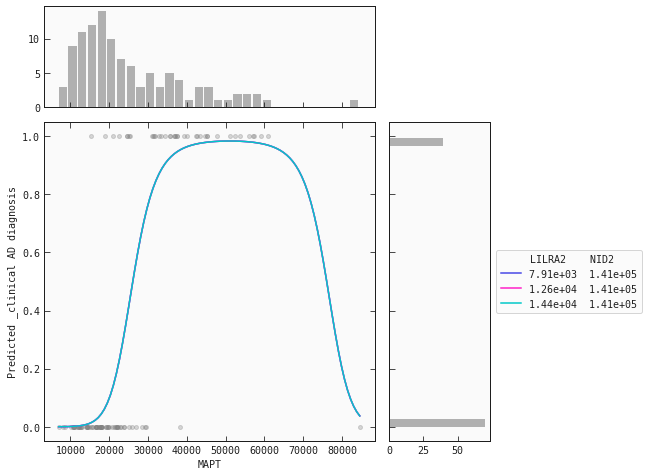

In [23]:
show_quantiles = 'LILRA2'
fixed = {}
fixed[show_quantiles] = [
    train_val[show_quantiles].quantile(q=0.25),
    train_val[show_quantiles].quantile(q=0.5),
    train_val[show_quantiles].quantile(q=0.75)
]

models_single[0].plot_response_1d(train_val, by = "MAPT", input_constraints=fixed)

# Cross-validation as a framework

In [9]:
from dirac.crossval._crossvalidation import crossvalidation_as_framework

In [11]:
results = crossvalidation_as_framework(data,
                                     target,
                                     kind = "classification",
                                     stypes = stypes,
                                     n_epochs = epochs,
                                     criterion=criterion,
                                     max_complexity = max_complexity)

In [12]:
# average performance of first 10 models
results.roc_auc.mean(), results.accuracy.mean()

(0.9415526506899056, 0.8666666666666666)

In [13]:
# average performance of first model
results.groupby("model_structure").first().roc_auc.mean(), results.groupby("model_structure").first().accuracy.mean()

(0.9365674170902929, 0.8623750734861847)

# <font color="green"> Cross-validation for the win

# NB - This version is slighly modified from the "offcial" in that it does not sort the output

In [22]:
from dirac.crossval import *

In [23]:
models_single_copy = []
for x in models_single:
    models_single_copy.append(x.copy())

In [24]:
df_cv = cross_validate_norder(models_single_copy, train_val)

In [25]:
df_cv

,model,model_string,bic_mean,aic_mean,auc_mean,auc_5percentile,auc_95percentile,accuracy_mean,accuracy_5percentile,accuracy_95percentile,pr_auc_mean,pr_auc_5percentile,pr_auc_95percentile,f1_mean,f1_5percentile,f1_95percentile
0,(<feyn._model.Element object at 0x147a06494950...,logreg(LILRA2 + MAPT + PPIA),16.141452,11.205064,0.983673,0.938776,1.0,0.935714,0.863312,1.000000,0.976634,0.923296,1.0,0.705118,0.608696,0.842105
1,(<feyn._model.Element object at 0x147a07d4a150...,logreg(HPRT1 + LILRA2 + MAPT),17.800566,12.864179,0.981983,0.938712,1.0,0.902543,0.807684,1.000000,0.970892,0.924989,1.0,0.699208,0.590963,0.800000
2,(<feyn._model.Element object at 0x147a07d6b410...,logreg(IGHV3-38 + LILRA2 + MAPT),17.340674,12.404287,0.976881,0.936543,1.0,0.931061,0.863312,1.000000,0.968581,0.920726,1.0,0.696895,0.590549,0.801176
3,(<feyn._model.Element object at 0x147a0648e6d0...,logreg(IGLV4-69 + MAPT + THY1),18.759707,13.823320,0.980453,0.948852,1.0,0.902435,0.817749,0.954545,0.969985,0.926159,1.0,0.709763,0.608696,0.804444
4,(<feyn._model.Element object at 0x147a07ab5ed0...,logreg(IGLV4-69 + MAPT + SERPINF1),19.064514,14.128126,0.972290,0.928125,1.0,0.915043,0.857143,0.956818,0.962071,0.907892,1.0,0.683234,0.583333,0.842105
5,(<feyn._model.Element object at 0x147a0703c350...,logreg(GPC1 + MAPT),15.297697,12.829503,0.960651,0.901594,1.0,0.918561,0.855195,1.000000,0.949404,0.887765,1.0,0.677092,0.582167,0.802105
6,(<feyn._model.Element object at 0x147a0703cd90...,logreg(IGHV3-38**2 + MAPT),20.573849,15.637461,0.966295,0.919579,1.0,0.892100,0.772727,0.956818,0.952355,0.896911,1.0,0.676253,0.591534,0.763810
7,(<feyn._model.Element object at 0x147a0700e510...,logreg(MAPT + RCN1 + YWHAG),18.047990,13.111602,0.962946,0.883099,1.0,0.914827,0.817749,1.000000,0.956278,0.899533,1.0,0.682214,0.590236,0.802105
8,(<feyn._model.Element object at 0x147a0700e110...,logreg(MAPT + NXPH3),18.364338,15.896144,0.960555,0.917538,1.0,0.856710,0.772727,0.954545,0.934776,0.845776,1.0,0.661666,0.559586,0.802105
9,(<feyn._model.Element object at 0x147a07012110...,logreg(MAPT + ZP2),18.609251,16.141058,0.956983,0.901594,1.0,0.871483,0.772727,0.954545,0.938424,0.852977,1.0,0.694976,0.582738,0.801176


In [26]:
df_cv.to_excel("AD_CV_251121.xlsx")

# Best model according to CV:

<?xml version="1.0" encoding="utf-8" ?>
<svg baseProfile="full" height="216.0" preserveAspectRatio="none" version="1.1" viewBox="0 0 621 216.0" width="621" xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><svg class="graph" height="155.0" width="351" x="0" y="0"><defs /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="241" y="50.0"><title>_clinical AD diagnosis
logistic:
w=-3.6127
bias=1.0022</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="286.0" y="71.5">_clinica..</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="329" y="59.0">0</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="243" y="59.0">out</text><line stroke="#1E1E1E" x1="211" x2="241" y1="67.5" y2="67.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="121" y="50.0"><title>add</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="166.0" y="71.5">add</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="209" y="59.0">1</text><line stroke="#1E1E1E" x1="91" x2="121" y1="37.5" y2="58.5" /><line stroke="#1E1E1E" x1="91" x2="121" y1="97.5" y2="76.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="20.0"><title>GPC1
linear:
scale=0.000013
scale offset=124790.741184
w=-1.024146
bias=0.3560</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="46.0" y="41.5">GPC1</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="89" y="29.0">2</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="3" y="29.0">num</text><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="80.0"><title>MAPT
linear:
scale=0.000038
scale offset=24261.693533
w=-2.344791
bias=0.0460</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="46.0" y="101.5">MAPT</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="89" y="89.0">3</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="3" y="89.0">num</text></svg><svg class="summary" height="79" width="180" x="351" y="0"><defs /><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="0" y="14">Training Metrics</text><line stroke="#1E1E1E" x1="0" x2="160" y1="19" y2="19" /><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="5" y="34">Accuracy</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="155" y="34">0.917</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="5" y="49">AUC</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="155" y="49">0.96</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="5" y="64">Precision</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="155" y="64">0.895</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="5" y="79">Recall</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="155" y="79">0.872</text></svg><svg class="summary" height="79" width="90" x="531" y="0"><defs /><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="0" 
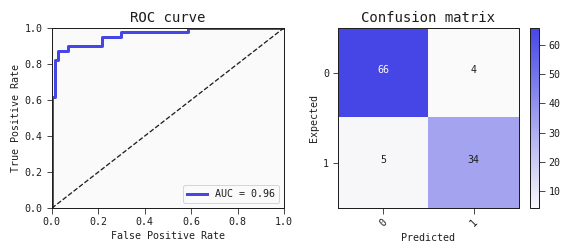
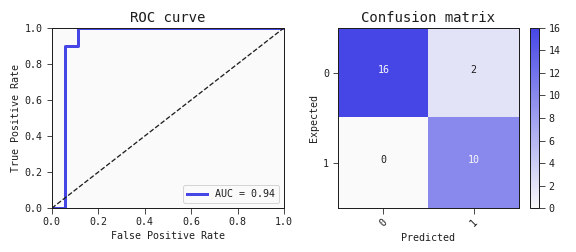

In [27]:
models_single[5].plot(train_val,test)

In [28]:
models_single[5].plot(train_val,test,filename="AD_QLattice_BestCVModel.html")

'/home/niels/manuscript_abzu/manuscript_AD_HCC_notebooks/notebooks/AD_QLattice_BestCVModel.html'

# Exploring model 5 further

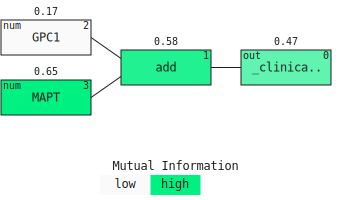

In [29]:
models_single[5].plot_signal(test,corr_func='mutual_information',filename=pathname+projectname+'bestmodelCV_signal_MI'+'.svg')

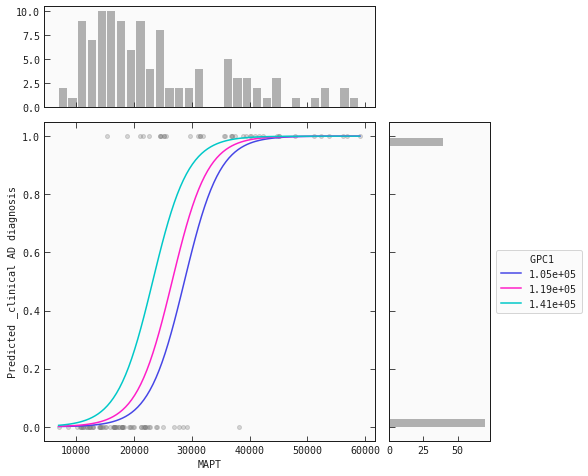

In [30]:
show_quantiles = 'GPC1'
fixed = {}
fixed[show_quantiles] = [
    train_val[show_quantiles].quantile(q=0.25),
    train_val[show_quantiles].quantile(q=0.5),
    train_val[show_quantiles].quantile(q=0.75)
]

models_single[5].plot_response_1d(train_val, by = "MAPT", input_constraints=fixed)